## 181. Employees Earning More Than Their Managers



**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Find all employees who earn more than their manager

#### SQL Schema

```sql
Create table If Not Exists Employee (id int, name varchar(255), salary int, managerId int)
Truncate table Employee
insert into Employee (id, name, salary, managerId) values ('1', 'Joe', '70000', '3')
insert into Employee (id, name, salary, managerId) values ('2', 'Henry', '80000', '4')
insert into Employee (id, name, salary, managerId) values ('3', 'Sam', '60000', 'None')
insert into Employee (id, name, salary, managerId) values ('4', 'Max', '90000', 'None')

```

Table: Employee

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
| salary      | int     |
| managerId   | int     |
+-------------+---------+
```
id is the primary key column for this table.  
Each row of this table indicates the ID of an employee, their name, salary, and the ID of their manager.


## Problem

Write an SQL query to find the employees who earn more than their managers.

Return the result table in **any order**.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Employee table:
+----+-------+--------+-----------+
| id | name  | salary | managerId |
+----+-------+--------+-----------+
| 1  | Joe   | 70000  | 3         |
| 2  | Henry | 80000  | 4         |
| 3  | Sam   | 60000  | Null      |
| 4  | Max   | 90000  | Null      |
+----+-------+--------+-----------+
```
**Output:**
```
+----------+
| Employee |
+----------+
| Joe      |
+----------+
```

**Explanation**: Joe is the only employee who earns more than his manager.

--- 

--- 

## Solution 1 - MSSQL

Basically we will need to self-join on `managerId` = `id` to get the initial resultset of employees and their manager.  Then we compare the salaries.

#### The Plan:
Select a row, and the previous two rows using LAG() and then filter where all three rows are the same.


```sql
/* Write your T-SQL query statement below */
SELECT  emp.name AS Employee
FROM    Employee emp
        JOIN Employee mgr ON mgr.id = emp.managerId
WHERE   emp.salary > mgr.salary


```

### Result

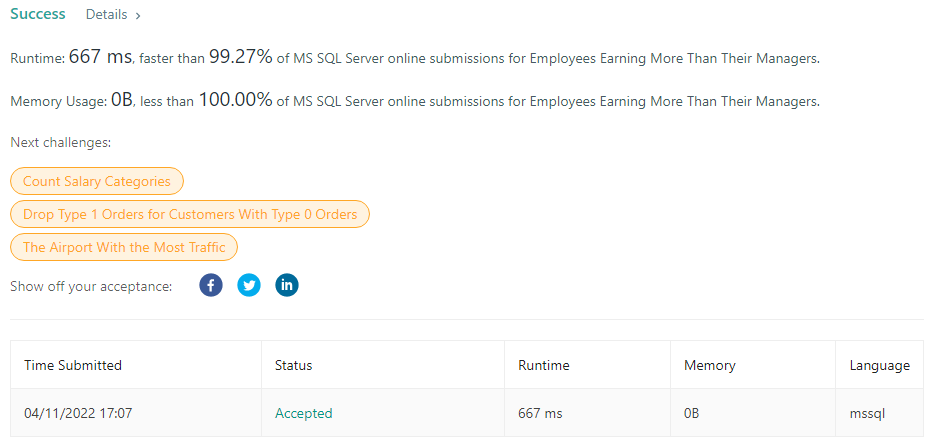



The results really suck.  Especially given how small the dataset is.

--- 

## Solution 2 - MSSQL - Use LAG() and LEAD()

Since the performance is so bad.  We are going to try using both LAG() and LEAD().



```sql
SELECT  emp.name AS Employee
FROM    Employee emp (NOLOCK)
        JOIN Employee mgr (NOLOCK) ON mgr.id = emp.managerId
WHERE   emp.salary > mgr.salary
```

### Result

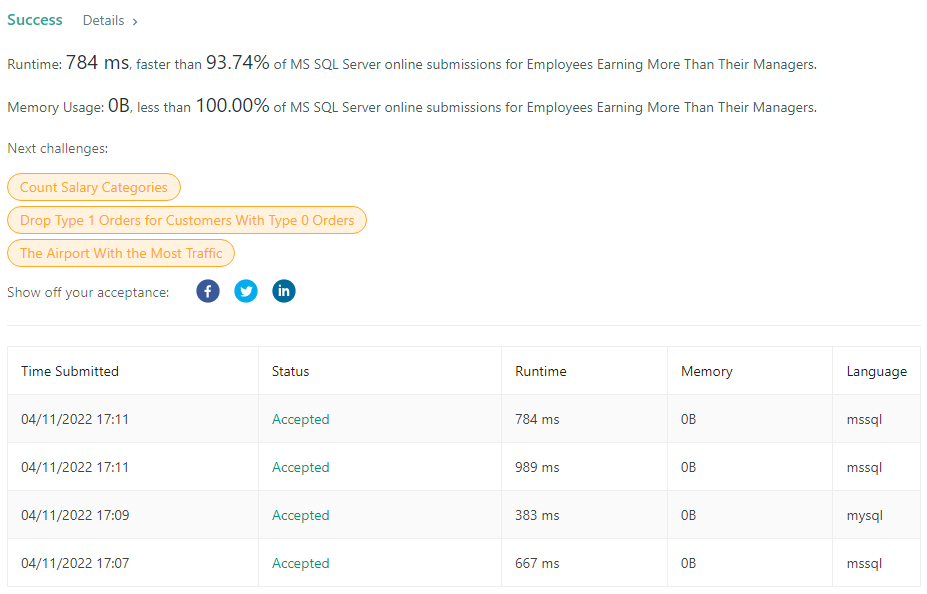

--- 

## Solution 3 - MySQL 

Pretty much the same thing in MySQL. 

```sql
# Write your MySQL query statement below
SELECT  emp.name AS Employee
FROM    Employee emp
        JOIN Employee mgr ON mgr.id = emp.managerId
WHERE   emp.salary > mgr.salary
;

```



### Result

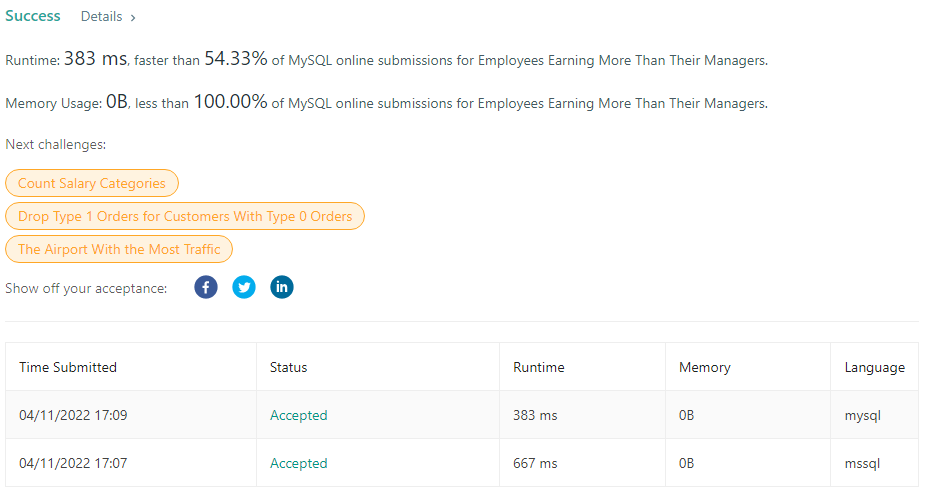




As usual MySQL is kicking butt on MSSQL.

--- 
